In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab\ Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks/esgc


# LangChain 개요  

- 2022년 10월 말 해리슨 체이스가 제작
- LangChain은 오픈 소스로 공개되어 있어 커뮤니티에서 지속적으로 발전하고 있음
- <font color=red>LLM과 애플리케이션의 통합</font>을 간소화하도록 설계된 강력한 프레임워크
- 간단하고 통합된 API를 활용하여 개발자들이 코드를 크게 변경하지 않고 <font color=red>모델을 쉽게 교체하거나 대체</font>할 수 있도록 함
- 검색 증강 생성(RAG) 어플리케이션 제작, 구조화된 데이터 분석, 챗봇 등을 제작 가능
- 주요 기능
  - <font color=red>문맥 인식</font>: 언어 모델과 다양한 문맥 소스(프롬프트 지시, 예제, 응답의 근거 내용 등)를 연동하며, 사용자의 문맥을 정확히 이해
  - <font color=red>추론 능력</font>: 제공된 문맥에 기반하여 어떤 대답을 할지, 또는 어떠한 액션을 취할지에 대한 추론이 가능

---

- 참고
  - https://www.samsungsds.com/kr/insights/what-is-langchain.html
  - https://velog.io/@26solitude/랭체인LangChain이란
  - https://wikidocs.net/book/14473
  - https://wikidocs.net/book/14314
  - 트러블슈팅 : https://wikidocs.net/232743

# 대규모 언어 모델(Large Language Model, LLM)의 문제점
- 일반적인 상황에서 프롬프트에 응답하는 데 탁월하지만, <font color=red>훈련한 적이 없는 특정 영역에서 성능이 떨어짐</font> → hallucination(환각)
- 상태를 저장하지 않으므로 이전 <font color=red>대화 내용을 기억하지 못함</font> → 데이터베이스의 필요
- 일률적인 규칙이 없으므로 감정 분석, 분류, 질문 답변과 요약 등 <font color=red>서로 다른 시나리오에 특화된 다양한 모델을 사용</font>해야 함
- 이를 위해서 기계 학습 엔지니어가 LLM을 조직의 내부 데이터 소스와 통합하고 프롬프트 엔지니어링을 적용해야 함
- LangChain은 이러한 데이터 응답 애플리케이션을 개발하기 위한 중간 단계를 간소화하여 프롬프트 엔지니어링의 효율성을 높임
  - LLM 기반 어플리케이션을 구축하기 위해서는 프롬프트를 보내고 응답을 기다리는 것 등의 작업이 필요 (매개변수 조정, 프롬프트 보강, 응답 조정 등)


#  랭체인을 구성하는 핵심 모듈

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain.png" width=40%>   
</center>  

- LLM의 가지는 다양한 문제점을 해결할 수 있는 방안을 제공

- ① <font color=red>데이터 소스</font>
  - 애플리케이션은 LLM에 대한 컨텍스트를 구축하기 위해 PDF, 웹 페이지, CSV, 관계형 데이터베이스와 같은 외부 소스에서 데이터를 검색해야 함
  - 랭체인은 서로 다른 소스에서 데이터에 액세스하고 검색할 수 있는 모듈과 원활하게 통합

- ② <font color=red>단어 임베딩(벡터 임베딩)</font>
  - 일부 외부 소스에서 검색한 데이터는 벡터로 변환해야 함
  - 선택한 LLM을 기반으로 최적의 임베딩 모델을 선택

- ③ <font color=red>벡터 데이터베이스</font>
  - 메모리 내 배열부터 파인콘(Pinecone)과 같은 호스팅 벡터 데이터베이스에 이르기까지 다양한 소스에서 벡터를 쉽게 저장하고 검색할 수 있도록 지원

- ④ <font color=red>언어 모델(LLM)</font>
  - 랭체인은 오픈AI, 코히어(Cohere), AI21에서 제공하는 주류 LLM과 허깅페이스(Hugging Face)에서 제공되는 오픈소스 LLM을 지원, 추가되는 LLM도 빠르게 업데이트
.

### LangChain 프레임워크 및 모듈의 작동 방식
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain2.png" width=60%>   
</center>

- <font color=red>에이전트</font>
  - LangChain에서 LLM(대형 언어 모델)을 사용하여 여러 작업(예: 데이터 검색, 계산, 번역 등)을 순서대로 또는 동적으로 선택하고 실행하는 모듈 `(일종의 동적 체인)`
  - ReAct 프롬프트 기법을 단순화하여 추론과 행동을 가능하게 함
  > ReAct??
  > - Reasoning and Acting 의 줄인 말
  > - 언어모델이 추론과 행동을 동시에 수행하도록 도와주는 방법
  > - 전통적인 방식은 단순히 답변만 내놓았다면, ReAct는 "이 문제를 어떻게 해결할지 고민(추론)하고, 그에 맞게 행동(ex.API 호출, 데이터 검색 등)을 실행하는 방식
  
    > ReAct 예시
    > - 에이전트의 역할
    >    - 추론: “내가 가지고 있는 재료는 무엇일까? 그리고 추가로 필요한 재료는 무엇일까?”
    >    - 행동: “주변 마트에서 재료를 주문하자” 또는 “냉장고에 있는 재료로 만들 수 있는 요리를 추천하자.”
    >
    > - ReAct 적용:
    > - 언어 모델이 “냉장고에 있는 재료”라는 정보를 바탕으로 “어떤 요리를 할 수 있을까?”를 고민(추론)한 후,
    > - 실제로 “요리법 검색”이나 “재료 구매”라는 행동을 실행

- <font color=red>Memory</font>
  - LLM은 상태를 저장하지 않지만 정확한 응답을 위해서는 컨텍스트가 필요
  - 단기 및 장기 메모리를 쉽게 추가할 수 있도록 지원
    - 단기 메모리는 간단한 메커니즘을 통해 대화 기록을 저장하고 관리
    - 메시지 기록은 레디스(Redis) 같은 외부 소스에 저장돼 장기 메모리를
유지할 수 있음

- <font color=red>콜백</font>
  - 특정 시점(ex.이벤트)에서 호출하여 사용하는 함수 구조
  - 개발자에게 LLM 애플리케이션의 다양한 단계에 연결할 수 있는 콜백 시스템을 제공하며 로깅, 모니터링, 스트리밍 및 기타 작업에 유용

- <font color=red>데이터 연결</font>
  - RAG에 초점을 맞춰 생성 단계에서 필요한 데이터를 외부 데이터 소스에서 가져오는 작업을 담당
  - 외부 문서를 로드하고, 일괄적으로 단어 임베딩으로 변환한 다음, 임베딩을 벡터 데이터베이스에 저장하고, 마지막으로 쿼리를 통해 검색

- <font color=red>체인</font>
  - 구성 요소와 LLM을 활용하여 예상되는 응답을 얻는 효율적인 파이프라인을 구축하도록 설계
  - 예를 들어, 체인은 문서를 요약한 다음 이에 대한 감정 분석을 수행하는 프롬프트가 포함될 수 있음

- <font color=red>모델 I/O</font>
  - LLM과의 상호 작용을 처리
  - 프롬프트 관리, 최적화 및 LLM과의 일반적인 인터페이스와 작업을 위한 유틸리티를 포함




### LangChain의 동작

#### 모델 I/O : 언어 모델과의 인터페이스
- 프롬프트를 관리하고 공통 인터페이스를 통해 언어 모델을 호출하고 모델 출력에서 정보를 추출

<center>  
Model I/O 개념도<br>
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain3.png" width=80%> <br>
</center>

> 1. **Format 단계**  
   - 입력 데이터(예: `x = "foo"`, `y = "bar"`)를 활용하여 최종적으로 LLM에 전달할 **프롬프트**(질문, 명령 등)를 형성함
   - 예시로, “`Does foo like bar, and why?`”라는 문장을 생성하여 LLM에게 전달할 형태로 가공하는 모습이 보임

> 2. **Predict 단계**  
   - **LLM** 혹은 **Chat Model**이 “Format 단계”에서 생성된 프롬프트를 입력받아 예측(추론) 과정을 수행함  
   - 예시에서 LLM이 출력한 내용은 “`Foo does…`”와 같은 텍스트 응답임

> 3. **Parse 단계**  
   - LLM이 생성한 텍스트 응답을 후처리하여, **JSON**과 같은 특정 형식으로 **구문 분석(Parsing)** 함  
   - 예시로, “`{ "likes": true, "reason": "Because..." }`”처럼 결과를 구조화된 데이터 형태로 변환하여 다른 시스템이 쉽게 처리하거나 후속 작업에 활용할 수 있도록 함

---

#### 데이터 연결 : 애플리케이션별 데이터와의 인터페이스
- 데이터 로드, 변환, 저장 및 쿼리하기 위한 빌딩 블록을 제공
- LangChain은 **데이터 소스 → 로딩 → 변환 → 임베딩 → 저장 → 검색**의 일련 과정을 모듈화하여, 개발자가 대규모 언어 모델과 외부 데이터를 손쉽게 연결하고 활용할 수 있도록 도움

<center>
Data Connection 흐름도 <br>
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain4.png" width=80%>   
</center>

> 1. **Source (데이터 소스)**  
   - 텍스트, 이미지, PDF, 소셜 미디어, 웹사이트 등 다양한 외부 데이터가 존재함
   - 애플리케이션에서 활용하고자 하는 **모든 데이터가 출발하는 지점**

> 2. **Load (로딩)**  
   - 데이터 소스에 있는 원시(raw) 데이터를 LangChain 애플리케이션으로 가져오는 단계  
   - PDF 파일에서 텍스트를 추출하거나, 웹 API에서 정보를 받아오는 등, **데이터를 애플리케이션이 처리 가능한 형태**로 로드함

> 3. **Transform (변환)**  
   - 로드된 데이터를 필요한 형태로 가공하거나 전처리하는 과정  
   - 예: 텍스트를 문장 단위로 분할, 불필요한 공백 제거, 언어 감지 등.

> 4. **Embed (임베딩)**  
   - 전처리된 텍스트나 문서 등을 **벡터(수치) 형태로 변환**하는 과정  
   - LLM이나 임베딩 모델을 통해 텍스트를 벡터로 변환하여 **유사도 검색** 등에 활용할 수 있음

> 5. **Store (저장)**  
   - 임베딩된 벡터를 벡터 데이터베이스나 다른 스토리지 시스템에 저장하는 단계  
   - 예: Pinecone, Redis, FAISS 등 다양한 벡터 데이터베이스를 사용함

> 6. **Retrieve (검색/검색 결과 활용)**  
   - 저장된 벡터를 토대로, 유사도 검색 등을 통해 **원하는 데이터를 빠르고 정확하게 조회**하는 단계  
   - 검색된 결과는 다시 LLM에 전달하거나, 후속 작업(예: 요약, 질의응답 등)에 사용됨

---

#### 메모리
- 대화형 시스템에 필요한 어느 정도 기간의 과거 메시지에 직접 액세스 기능 지원
- **Memory**는 대화의 **맥락(과거 대화 기록)**을 보존하고, 이를 모델에게 제공해 **연속적인 질의응답**이 가능하게 함  
- **READ**와 **WRITE** 과정을 통해 모델이 대화 중에 점진적으로 축적된 정보를 계속 참고할 수 있음
- `체인` 실행 간 애플리케이션 상태 유지
> `체인`??
  - 랭체인은 체인으로 연결된 애플리케이션을 위한 체인 인터페이스를 제공
  - LangChain에 다양한 AI 구성 요소를 유지하며 컨텍스트 인식 응답을 제공한다는 기본 원칙
  - 사용자의 쿼리부터 모델의 출력에 이르기까지 일련의 자동화된 작업

<center>
메모리 모듈 개념도 <br>
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain5.png" width=80%>   
</center>

> 1. **과거 메시지(“past_messages”)**  
   - 이전에 주고받았던 질문과 답변 등, **대화의 맥락**이 담겨 있음
   - LangChain은 이 과거 대화 기록을 **Memory**에 저장해두고 필요할 때 불러옴

> 2. **READ 단계**  
   - 모델이 새 질문(“question”)을 처리하기 전에, **Memory**로부터 과거 메시지(맥락)를 읽어와서 **프롬프트**를 구성함  
   - 예: “(past_messages) (question)” 형태로 과거 대화와 새 질문을 합쳐 모델에 전달

> 3. **Model 추론**  
   - 모델(LLM)은 주어진 프롬프트(과거 메시지 + 현재 질문)에 대해 **응답**을 생성함  
   - 이때, **출력 파서(Output parser)**를 사용해 모델 응답을 특정 형식(예: JSON, 정규표현식 등)으로 변환할 수도 있음

> 4. **WRITE 단계**  
   - 모델이 생성한 응답(“answer”)을 **Memory**에 다시 저장하여, 이후 대화에서 **맥락**으로 활용할 수 있도록 함  
   - 이렇게 메모리에 쓰여진 정보는 다음 질문 시에 다시 **READ** 단계를 거쳐 모델에 제공됨






# LangChain 라이브러리
- LangChain Python 기반 공식 가이드 문서 : https://python.langchain.com/docs/introduction/

| 항목                                               | 내용                                                                                                                                                                                                                                                                              |
| :------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| <font color=red>LangChain</font>                  | 기본 런타임 및 즉시 사용 가능한 체인(Chain)과 에이전트(Agent)의 구현을 포함하여 **LLM 기반 애플리케이션**을 쉽게 구성할 수 있는 핵심 라이브러리<br>주요 모듈(체인, 에이전트, 메모리, 데이터 연결 등)을 제공하며 **프롬프트 엔지니어링**을 체계화할 수 있음<br>                         |
| <font color=red>LangChain Template</font>         | 다양한 작업에 대한 **참조 아키텍처** 또는 템플릿을 제공하여 쉽게 배포 가능<br>실제로는 **LangChain Hub**나 **PromptTemplate**와 같은 형태로 존재하며, 특정 사용 사례별 예시를 공유하기도 함<br>따라서 'LangChain Template'라는 별도의 라이브러리는 아니며 **샘플/템플릿 모음**에 가까움<br> |
| <font color=red>LangServe</font>                  | LangChain 체인을 **REST API**로 배포하기 위한 라이브러리<br>체인(Chain)을 **마이크로서비스** 형태로 제공하여 서버 환경에서 체인 실행을 관리하고, 외부 HTTP 요청에 대한 응답을 쉽게 제공할 수 있음<br>                                                                                 |
| <font color=red>LangSmith</font>                  | LangChain으로 구축된 체인을 **디버그, 테스트, 평가, 모니터링**할 수 있도록 해주는 개발자 플랫폼<br>LangChain과 원활하게 통합되어, 프로토타입에서 프로덕션으로 이전할 때 **언어 모델 애플리케이션** 및 **지능형 에이전트**를 추적하고 평가하는 데 유용<br>모델 응답의 품질 측정, 체인 성능 분석, 버전 관리 등을 제공하여 **운영 환경에서의 안정성** 확보에 도움<br> |
| <font color=red>LangGraph</font>                  | LLM을 사용해 상태 유지를 지원하는 **다중 액터(Multi-actor) 애플리케이션**을 구축하기 위한 라이브러리<br>LangChain의 에이전트·메모리 등과 함께 사용하여 **대규모 멀티스텝 워크플로**를 설계할 수 있음<br>                                                                               |

---

## LangChain의 장점

| 분류                | 주요 내용                                                                                                                                                                          |
| :------------------ | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 언어 모델 용도 변경 | **재훈련이나 미세 조정 없이** LLM을 다양한 분야의 애플리케이션에 재활용 가능<br>독점 정보를 참조해 모델 응답을 보강하는 **복잡한 애플리케이션** 구축 가능<br>**RAG**(검색 증강 생성) 워크플로를 통해 모델 할루시네이션(거짓 정보 생성)을 줄이고 **응답 정확도** 향상<br> |
| AI 개발 간소화      | 복잡한 데이터 소스 통합과 **프롬프트 세분화** 과정을 추상화하여 AI 개발을 간소화<br>개발자는 **시퀀스**를 사용자 지정해 복잡한 애플리케이션을 빠르게 구축 가능<br>                                                         |
| 개발자 지원         | 언어 모델을 **외부 데이터 소스**와 연결하기 위한 다양한 도구 제공<br>오픈 소스이자 활발한 커뮤니티 지원으로 **지속적 업데이트** 및 풍부한 예시 확보<br>                                                                     |



# LangChain 설치


- 의존성 라이브러리 설치

# API key 획득 및 설정



- OpenAI 로그인 및 결재 등록
  - https://platform.openai.com/docs/overview 에 접속
  - Sign Up을 클릭하여 로그인
  - 우측 상단의 Setting 버튼(⚙️)을 클릭
  - Billing 메뉴에서 Add pyayment details 버튼을 클릭하여 신용카드를 등록

  <center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_reg01.png" width=60%>   
</center>

    - "Add to credit balance" 버튼을 눌러 사용할만큼의 미화(달러)를 입력
      - 금액은 $5 부터 추가가 가능 (최소금액)
    - 금액을 입력한 후 "Continue" 를 눌러 결제를 진행  
      - 왼쪽의 "Limits" 탭에서 월간 사용한도를 설정

  - 신용카드를 등록했다면 등록된 신용카드는 Payment methods 탭을 클릭하면 확인 가능






### OpenAI API 키 발급 및 테스트
- 우측 프로필 이미지 클릭 → `Your profile` 클릭
- `User API keys` 클릭 → `Create new secrete key` 버튼을 클릭
- 이름 입력
- API 키 복사
> ⚠️주의사항 : API 키는 한번만 제공됨, 복사하여 개인 메모장(또는 마크다운)에 저장해둘 것을 권장

  <center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key.png" width=40%>   
</center>

  <center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key02.png" width=40%>   
</center>

  <center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key03.png" width=40%>   
</center>

- API 키 등록

# 프롬프트 작성 원칙
- 모델이 최대한 정확하고 유용한 정보를 제공할 수 있도록 효과적인 프롬프트를 작성하는 것이 매우 중요

- 명확성과 구체성
  - 질문은 명확하고 구체적이어야 함 (모호한 질문은 LLM 모델의 혼란을 초래)
  - 예시:  "주식 시장은 ?" -> "다음 주 주식 시장에 영향을 줄 수 있는 예정된 이벤트들은 무엇일까?"

- 배경 정보 포함
  - 모델이 문맥을 이해할 수 있도록 필요한 배경 정보 제공 (환각 현상(hallucination) 감소 및 관련성 높은 응답 생성)
  - 예시: "2020년 미국 대선의 결과를 바탕으로 현재 정치 상황에 대한 분석을 해주세요"
  
- 간결함
  - 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제 (복잡하면 덜 중요한 부분에 집중하거나 상당한 영향을 받는 문제 발생)
  - 예시: "2021년에 발표된 삼성전자의 ESG 보고서를 요약해주세요."

- 열린 질문 사용
  - 열린 질문을 통해 모델이 자세하고 풍부한 답변을 제공하도록 유도 (예/아니오로 답변하는 질문보다는 많은 답변을 요구하는 질문)
  - 예시: "신재생에너지에 대한 최신 연구 동향은 무엇인가요?"

- 명확한 목표 설정
  - 얻고자 하는 정보나 결과의 유형을 정확하게 정의 (명확한 지침에 따라 응답을 생성)
  - 예시: "AI 윤리에 대한 문제점과 해결 방안을 요약하여 설명해주세요."

- 언어와 문체
  - 대화의 맥락에 적합한 언어와 문체를 선택 (상황에 맞는 표현 선택)
  - 예시: 공식적인 보고서를 요청하는 경우, "XX 보고서에 대한 전문적인 요약을 부탁드립니다."와 같이 정중한 문체를 사용


# GPT?

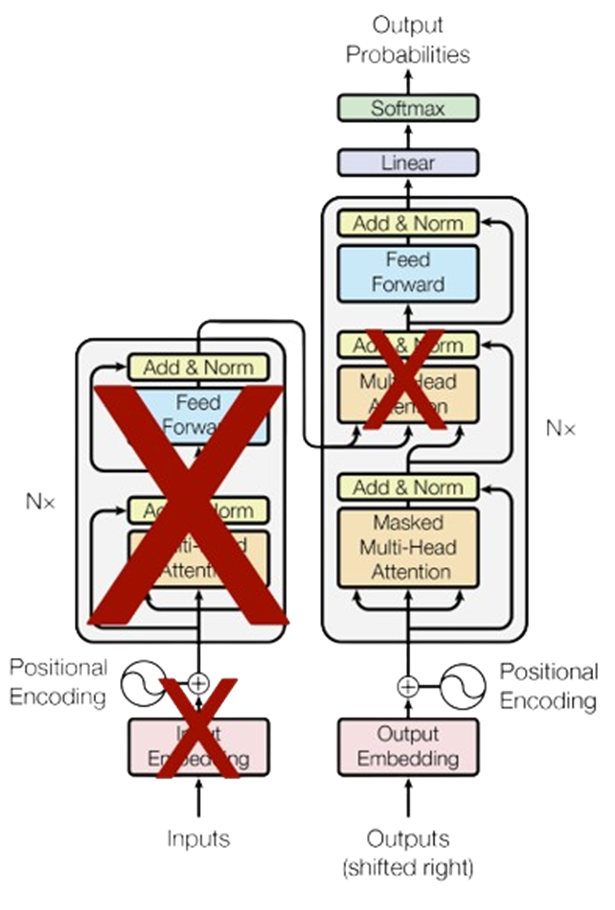

- GPT (Generative Pre-trained Transformer) : 대규모 텍스트 데이터를 학습한 후, 주어진 텍스트 입력에 대한 예측과 텍스트 생성을 수행하는 모델.

- 트랜스포머의 디코더 구조 사용 : GPT는 트랜스포머의 디코더 구조만을 사용함
  - 디코더는 새로운 문장을 생성하는 역할을 맡음
  - 디코더는 앞에 나온 단어들을 참고하여 다음 단어를 예측해 문장을 만들어냄

- 일방향 모델 : 문장을 왼쪽에서 오른쪽으로 한 방향으로만 이해함
  - 이는 단어를 순차적으로 생성하는 데에 강점을 줌
  - 예를 들어, GPT는 “I love reading”이라는 문장이 주어졌을 때, 다음에 나올 단어를 예측하는 데 매우 뛰어난 성능을 보임

- 문장 생성에 강점 : GPT는 주어진 문맥을 바탕으로 새로운 문장을 생성하는 데에 매우 능숙함
  - 대화형 AI, 자동 글쓰기, 스토리 생성 등 문장을 만들어내는 작업에서 강력한 성능을 보임

---

- 추가 보완 사항:
  - BERT는 양방향 특성으로 인해 문장을 더 잘 이해할 수 있지만, 생성 작업에는 적합하지 않다는 점
  - GPT는 일방향 모델로서 문장의 생성에는 뛰어나지만, 문장의 전체적인 의미를 이해하는 데는 BERT만큼 강하지 않다는 점


# GPT 모델 기본 구조
- Self-Attention Mechanism: 문장 내의 단어들이 서로 어떤 관계를 맺고 있는지를 파악하는 메커니즘.
- Position-wise Feed-Forward Networks: 각 단어의 위치 정보를 고려하여 처리를 진행.
- Multi-Head Attention: 다양한 관점에서 단어 간의 관계를 살펴보는 방법.

### Huggingface 모델로 맛보기

- GPT 버전별 특징

| GPT 버전    | 출시년도 | 주요 특징 및 개선점                                                                                                                                                                                                                                                                                                            | 모델 규모 (파라미터)                                        |
|-------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| **GPT-1**   | 2018     | - Transformer 구조를 기반으로 최초의 GPT 모델<br>- 자연어 생성 및 이해의 가능성을 실험적으로 입증함                                                                                                                                                                                                                             | 약 **117M**                                               |
| **GPT-2**   | 2019     | - 모델 규모와 성능이 크게 향상됨<br>- 뛰어난 텍스트 생성 능력으로 주목받음<br>- 남용 위험 문제로 초기에는 전체 공개가 지연됨                                                                                                                                                                                                    | 약 **1.5B**                                               |
| **GPT-3**   | 2020     | - Few-shot 학습 등 다양한 작업 수행 능력 극대화<br>- 자연어 처리의 다재다능함을 입증<br>- 상업적 활용 및 연구에 폭넓게 응용됨                                                                                                                                                                                                 | 약 **175B**                                               |
| **GPT-3.5** | 2022     | - 대화형 응용(예: ChatGPT)과 코드 생성 성능 개선<br>- 사용자 피드백 반영 미세 조정(Fine-tuning)을 통해 성능 향상<br>- GPT-3 대비 더 자연스러운 대화와 응답 제공                                                                                                                                                              | 공식 수치는 공개되지 않았으나 GPT-3 대비 확장된 규모로 추정됨   |
| **GPT-4**   | 2023     | - 멀티모달 입력(텍스트, 이미지 등) 지원<br>- 향상된 추론 능력 및 정밀도, 안전성 강화<br>- 다양한 응용 분야에서의 활용성이 극대화됨                                                                                                                                                                                                | 공식 수치는 공개되지 않았으나 GPT-3보다 크게 확장된 규모로 추정됨 |
| **GPT-5**   | 향후 출시 (예상) | - **미래 전망**: 더욱 정교한 언어 이해 및 생성, 멀티모달 입력의 확장, 안전성 및 효율성 강화<br>- 계산 최적화 및 더 효과적인 학습 기법 적용으로, 다양한 응용 분야에서 혁신적인 성능 제공 기대<br>- 연구 및 산업 전반에 걸쳐 **새로운 가능성** 제시 예상                                                            | 예상: **수천억 ~ 수조 단위** (추정치, 공식 발표 전까지는 불확실함)     |


# LangChain 모델 유형
- <font color=red>LLM</font>과 <font color=red>Chat Model</font> 클래스을 지원
- LLM은 주로 <font color=red>단일 요청에 대한 출력을 생성</font>하는 반면, Chat Model은 <font color=red>사용자와의 상호작용을 통한 연속적인 대화 관리</font>에 더 적합
- 공식 가이드에서는 LLM보다는 `Chat Model`을 권장

# LLM 클래스
- 기능: <font color=red>텍스트 문자열을 입력으로 받아 처리한 후, 텍스트 문자열을 반환</font>
- 광범위한 언어 이해 및 텍스트 생성 작업에 사용

> LLM 모델 가이드 : https://python.langchain.com/docs/integrations/llms/
> - 다양한 LLM 모델을 LangChaine에서 어떻게 다룰 수 있는지에 대한 각각의 가이드라인 명세

- LLM 클래스 사용해보기

> 템플릿 활용 맛보기 (체인 사용 없이 구현)
- Python 문자열 포맷팅 비슷
- 프롬프트를 구조화(ex.자주쓰는 프롬프트)하여 활용 가능

# 프롬프트 탬플릿 (PromptTemplate) 구성 요소
- PromptTemplate : 단일 문장 또는 입력변수 등의 <font color=red>간단한 명령을 입력</font>하여 단일 문장 또는 <font color=red>간단한 응답을 생성</font>하는 데 사용되는 프롬프트를 구성할 수 있는 문자열 템플릿
  - <font color=red>지시</font> : 언어 모델에게 어떤 작업을 수행하도록 요청하는 구체적인 지시
  - <font color=red>예시</font> : 요청된 작업을 수행하는 방법에 대한 하나 이상의 예시
  - <font color=red>맥락</font> : 특정 작업을 수행하기 위한 추가적인 맥락
  - <font color=red>질문</font> : 어떤 답변을 요구하는 구체적인 질문

> 예시: 제품 리뷰 요약
- 지시: "아래 제공된 제품 리뷰를 요약해주세요."
- 예시: "예를 들어, '이 제품은 매우 사용하기 편리하며 배터리 수명이 길다'라는 리뷰는 '사용 편리성과 긴 배터리 수명이 특징'으로 요약할 수 있습니다."
- 맥락: "리뷰는 스마트워치에 대한 것이며, 사용자 경험에 초점을 맞추고 있습니다."
- 질문: "이 리뷰를 바탕으로 스마트워치의 주요 장점을 두세 문장으로 요약해주세요."


- 프롬프트 템플릿의 활용
  - 파라미터
    - <font color=red>template</font>: 문자열 템플릿 및 변수 설정 (중괄호 {} 사용)
    - <font color=red>input_variables</font> : PromptTemplate에서 사용되는 변수(중괄호 안에 들어갈 변수)의 이름을 정의하는 리스트

 - <font color=red>from_template()</font> : 문자열 템플릿을 직접 설정하는 함수

# LangChain Expression Language (LCEL)
- https://blog.langchain.dev/langchain-expression-language/
- <font color=red>체인을 구성하고 스트리밍, 배치 및 비동기 지원</font>을 기본적으로 제공하는 선언적 방법
- 기본적으로 파이썬 또는 타입스크립트/자바스크립트를 사용한 체인 만들기의 고수준 대안으로 코드를 사용해 구성할 때 사용하는 모든 기존 랭체인 생성자를 그대로 사용해 체인을 만들 수 있음

# | (파이프라인)으로 체인 생성하기 (LCEL)
  - LangChain 0.1.17 이후 버전부터 사용
  - <font color=red>|</font> 기호는 unix 파이프 연산자와 유사하며, <font color=red>서로 다른 구성 요소를 연결하고 한 구성 요소의 출력을 다음 구성 요소의 입력으로 전달</font>

  - prompt | llm | OutputParser와 같이 체인이 연결된 경우
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/lcel1.png" width=60%>   
</center>

- 표준 인터페이스 함수을 이용하여 딕셔너리 형태로 값들을 전달
   - <font color=red>invoke()</font> : 단일 딕셔너리 입력에 대해 체인을 호출
   - <font color=red>batch()</font> : 여러 입력(ex.딕셔너리의 리스트)에 대해 체인을 호출
   - <font color=red>stream()</font> : 응답의 청크를 스트리밍

# Chat Model 클래스
- 기능: 메시지의 리스트를 입력으로 받고, 하나의 메시지를 반환
- <font color=red>대화형 메시지를 입력으로 사용하고 대화형 메시지를 출력</font>으로 반환하는 특수화된 LLM 모델
- 일반 텍스트를 사용하는 대신 <font color=red>대화의 맥락을 포함한 메시지를 처리</font>하며, 이를 통해 보다 더 <font color=red>자연스러운 대화를 가능</font>하게 함
- (예시) 사용자가 챗봇과 대화하는 상황에서, 사용자의 질문과 이전 대화 내용을 고려하여 적절한 답변을 생성

- Chat Model 인터페이스의 특징
  - 대화형 입력과 출력
    - 대화의 연속성을 고려하여 입력된 메시지 리스트를 기반으로 적절한 응답 메시지를 생성
    - 챗봇, 가상 비서, 고객 지원 시스템 등 대화 기반 서비스에 활용

  - 다양한 모델 제공 업체와의 통합
    - OpenAI, Cohere, Hugging Face 등 다양한 모델 제공 업체와의 통합을 지원
    - 개발자는 여러 소스의 Chat Models를 조합하여 활용

  - 다양한 작동 모드 지원
    - 랭체인은 동기(sync), 비동기(async), 배치(batching), 스트리밍(streaming) 모드에서 모델을 사용할 수 있는 기능을 제공
    - 다양한 애플리케이션 요구사항과 트래픽 패턴에 따라 유연한 대응이 가능

# GPT3.5, GPT4o, GPT4.1 비교
- OpenAI Models 가이드 : https://platform.openai.com/docs/models

| 항목                                          | 설명                                                                                                                                                         | 예시 값                                                             |
|-----------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------|
| **content**                                   | LLM이 생성한 최종 응답 텍스트                                                                                                                                    | '한국의 수도는 서울이다.'                                             |
| **additional_kwargs**                         | 추가로 전달된 매개변수 정보<br>여기서는 거부(refusal) 관련 값이 포함되어 있으나, 별도의 거부 값은 없음                                                            | {'refusal': None}                                                   |
| **response_metadata**                         | 모델 실행에 대한 상세 메타데이터<br>모델 이름, 토큰 사용량, 응답 종료 사유 등 다양한 정보를 포함                                                                | 아래 참조                                                           |
| &nbsp;&nbsp;&nbsp;• token_usage.prompt_tokens | 프롬프트(입력)로 사용된 토큰 수                                                                                                                                | 19                                                                  |
| &nbsp;&nbsp;&nbsp;• token_usage.completion_tokens | LLM이 생성한 응답에 사용된 토큰 수                                                                                                                              | 14                                                                  |
| &nbsp;&nbsp;&nbsp;• token_usage.total_tokens   | 입력과 응답에 사용된 총 토큰 수                                                                                                                                | 33                                                                  |
| &nbsp;&nbsp;&nbsp;• token_usage.completion_tokens_details | 응답 토큰의 세부 분류 (예: 허용된 예측, 오디오, 추론, 거부된 예측 토큰 수)                                                                                          | {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0} |
| &nbsp;&nbsp;&nbsp;• token_usage.prompt_tokens_details      | 입력 토큰의 세부 분류 (예: 오디오, 캐시된 토큰 수)                                                                                                          | {'audio_tokens': 0, 'cached_tokens': 0}                               |
| &nbsp;&nbsp;&nbsp;• model_name                 | 실제로 응답을 생성한 모델의 이름                                                                                                                                | 'gpt-3.5-turbo-0125'                                                |
| &nbsp;&nbsp;&nbsp;• finish_reason              | 모델이 응답을 종료한 이유<br>예: 'stop'은 자연스럽게 응답이 완료되었음을 의미                                                                        | 'stop'                                                              |
| &nbsp;&nbsp;&nbsp;• logprobs                   | 로그 확률 정보 (없으면 None)                                                                                                                                   | None                                                                |
| **id**                                        | 해당 실행의 고유 식별자                                                                                                                                         | 'run-ee3e64c1-6d49-4f9b-aa06-2875d01ab547-0'                         |
| **usage_metadata**                            | 입력 및 출력 토큰 사용에 대한 추가 메타데이터                                                                                                                   | 아래 참조                                                           |
| &nbsp;&nbsp;&nbsp;• input_tokens              | 프롬프트(입력)로 사용된 토큰 수 (response_metadata와 중복 정보)                                                                                              | 19                                                                  |
| &nbsp;&nbsp;&nbsp;• output_tokens             | 응답 생성에 사용된 토큰 수 (response_metadata와 중복 정보)                                                                                                   | 14                                                                  |
| &nbsp;&nbsp;&nbsp;• total_tokens              | 입력과 출력 토큰의 총합 (response_metadata와 중복 정보)                                                                                                       | 33                                                                  |
| &nbsp;&nbsp;&nbsp;• input_token_details        | 입력 토큰에 대한 세부 정보 (예: 오디오, 캐시 읽기 등)                                                                                                          | {'audio': 0, 'cache_read': 0}                                         |
| &nbsp;&nbsp;&nbsp;• output_token_details       | 출력 토큰에 대한 세부 정보 (예: 오디오, 추론 관련 토큰 수)                                                                                                      | {'audio': 0, 'reasoning': 0}                                          |


# ChatPromptTemplate
- **프롬프트 템플릿** : <font color=red>여러 메시지(예: 시스템, 사용자, AI 등)를 하나의 대화 흐름으로 구성하여 단일 메시지 응답을 생성</font>하는 데 사용
    > 예를 들어, **SystemMessage**는 전체 대화의 톤이나 규칙을 정하고, **HumanMessage(user)**는 사용자의 질문이나 요청을 나타내며, **AIMessage**는 그에 대한 응답을 제공
- 대화형 모델이나 챗봇 개발에 주로 사용
- 입력은 여러 메시지를 원소로 갖는 리스트로 구성되며, 각 메시지는 <font color=red>역할(role)</font>과 <font color=red>내용(content)</font>으로 구성

<br>

- Message 유형

| 메시지 유형            | 설명                                                                                                                                              | 사용 예시                                               |
|---------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------|
| **SystemMessage**   | 시스템이나 어시스턴트의 동작 방식, 규칙, 지침 등을 설정하기 위한 메시지<br>예를 들어, “이 대화는 친절하게 응답해야 합니다” 같은 내부 설정 정보를 전달함 | "시스템: 앞으로 모든 답변은 간단하고 명확하게 해주세요."   |
| **HumanMessage(user)**    | 사용자가 직접 입력하는 메시지<br>대화에서 질문이나 요청, 정보를 전달하는 역할을 함                                              | "사용자: 이번 프로젝트의 마감 일정은 어떻게 되나요?"        |
| **AIMessage**       | AI가 사용자 질문에 대해 응답하는 메시지<br>실제 모델의 응답이나 생성된 텍스트가 포함됨                                             | "AI: 프로젝트 마감일은 다음 주 금요일"             |
| **FunctionMessage** | 특정 함수나 API 호출의 결과를 전달하기 위해 사용됨<br>예를 들어, 데이터베이스 조회 결과나 계산 결과를 전달할 때 활용됨                   | "함수: 검색 결과 { 'item': '데이터 분석', 'score': 0.95 }" |
| **ToolMessage**     | 외부 도구나 서비스(예: 웹 크롤러, 이미지 분석 등)의 호출 결과를 표시하는 메시지<br>도구가 수행한 작업의 결과를 포함함                   | "도구: 이미지 분석 결과, 객체가 3개 감지되었습니다."      |

### <font color=red>from_messages()</font> 사용해보기
- 튜플 형태로 구성된 메시지 리스트를 입력 받아서, 각 메시지의 **역할(role)**과 **내용(content)**을 기반으로 대화형 프롬프트를 구성하는 함수
- **동작 예제 :**  
  1. **입력**: 예를 들어,  
     ```python
     messages = [
         ("system", "이 대화는 전문적이고 정중하게 진행됩니다."),
         ("user", "최근 데이터 분석 결과에 대해 설명해 주세요.")
     ]
     ```
     여기서 각 튜플은 첫 번째 원소에 역할(예: "system", "user")을, 두 번째 원소에 메시지 내용을 담음
  2. **처리**: `from_message()` 함수는 이 튜플 리스트를 받아 각 메시지의 역할과 내용을 확인한 후, 이를 대화의 맥락을 반영한 메시지 리스트(대화형 프롬프트)로 변환함
  3. **결과**: 최종적으로, ChatPromptTemplate에 맞는 메시지 리스트가 생성되어, 대화형 모델에게 전달할 준비가 완료됨

##### 문서번역기 만들기
- 한국어를 영어로 번역하는 chain 구성하기 (실습)

- 메시지에 출력 양식 포함

- 2개 이상의 변수를 템플릿 안에 정의
  

- batch() : 여러 입력(ex.딕셔너리의 리스트)에 대해 체인을 호출

- stream() : 응답의 청크를 스트리밍 (결과 메세지를 청크단위로 받는 함수)

위에서 stream content를 출력하기 위해 써봤던 코드
```python
for token in chain_stream :
    print(token, end = "", flush = False)
```

- stream은 반복가능한 객체를 반환
- content를 출력할 경우 반복문 필요
- 이러한 작성에 대해 편의성을 제공하게끔 만든게 teddynote 패키지 (유튜버, 랭체인 확장 패키지)

##### 문서요약시스템 만들어보기

#### BERT 기반 요약과 GPT 기반 요약의 주요 차이
| 구분         | BERT 기반 요약                                      | GPT 기반 요약                                        |
| ---------- | ----------------------------------------------- | ------------------------------------------------ |
| 요약 방식      | **추출적(Extractive)**<br>원문에서 핵심 문장·구를 뽑아 연결      | **생성적(Abstractive)**<br>모델이 이해한 내용을 바탕으로 새 문장 생성 |
| 대표 모델·기법   | BERTSUM, TextRank+BERT, BertExt                 | GPT-3, GPT-4, T5, PEGASUS 등                      |
| 문장 유창성·연결성 | 원문 문장 그대로라 유창성·연결성 제한<br>→ 문장 간 이음새 부자연스러울 수 있음 | 자연어 생성 특화 → 유창하고 일관된 연결 가능                       |
| 정보 보존      | 원문 핵심 정보 안정적으로 보존                               | 정보 왜곡 가능성(모델이 과잉·누락 생성 위험)                       |
| 계산 비용·속도   | 상대적으로 가볍고 빠름                                    | 큰 언어 모델이라 연산량·메모리 소모 큼                           |
| 제어 가능성     | 중요 문장 선택 기준(스코어·클래스) 명확                         | 프롬프트 설계로 요약 톤·길이 제어 가능                           |
| 학습 데이터     | 일반 문장 분류·순위 학습에 적합                              | 대량 생성 데이터 → 다양한 패턴 학습 가능                         |
| 활용 예시      | 뉴스 헤드라인 생성, 긴 문서 중요 문장 추출                       | 블로그 요약, 보고서 요약, 대화 요약 등                          |


# 데이터를 효과적으로 전달하는 방법
- 보통은 딕셔너리 형태(또는 일반 텍스트)로 요청
- RunnablePassthrough 를 사용하게 되면, 불필요한 키값지정 없이 PlaceHolder(자리표시자)에 전달 가능

### RunnablePassthrough
- RunnablePassthrough
  - 체인 내에서 데이터를 단순하게 전달하거나 추가 정보를 결합할 때 유용한 도구

> <font color=red>RunnablePassthrough()</font> : 입력 받은 데이터를 그대로 다음 단계로 전달
> - 별도의 데이터 변환 없이 현재 데이터를 그대로 넘겨야 할 때 사용

> <font color=red>RunnablePassthrough.assign(...)</font> : 입력 데이터에 추가적인 key/value 쌍을 병합하여 전달
> - 원래 데이터에 새로운 정보를 추가하고 싶을 때 사용
> - 예를 들어, 입력에 {"name": "Alice"}가 있다면, assign({"role": "manager"})를 사용하여 {"name": "Alice", "role": "manager"}로 결합할 수 있음

> <font color=red>RunnableParallel()</font> : 여러 Runnable 인스턴스를 동시에(병렬로) 실행
> - 여러 작업을 동시에 처리하여 효율성을 높이고자 할 때 사용



- RunnablePassthrough()로 체인 구성

- RunnablePassthrough.assign() : 입력에 추가 데이터 병합하기
> ex.사용자의 프로필 데이터를 처리하면서 몇 가지 추가적인 데이터를 동적으로 생성하는 경우

- RunnableParallel() : 여러 Runnable 인스턴스를 동시에(병렬로) 실행
> 다른 질문이지만, 같은 Placeholder 값을 전달할 때 유용

# 출력 파서 (Ouput Parser)

- 기능 : LLM이 생성한 원시 텍스트 결과를 원하는 형식으로 변환<br>
```ex. 정보 추출, 결과 정제, 조건에 따른 로직 적용 등 수행 가능```

> <font color=red>PydanticOuputParser()</font> : 구조화된 정보로 변환
> -  단순 텍스트 형태의 응답 대신, 사용자가 필요로 하는 정보를 명확하고 체계적인 형태로 제공

> <font color=red>CommaSeparatedListOutputParser()</font> : CSV로 변환 (콤마`,`로 구분)

> <font color=red>StrOutputParser()</font> : 문자열로 변환

> <font color=red>StructuredOutputParser()</font> : dict 형식으로 변환

> <font color=red>JsonOutputParser()</font> : JSON으로 변환

> <font color=red>DatetimeOutputParser()</font> : 날짜형식 (datetime)으로 변환

> <font color=red>EnumOutputParser()</font> : Enum 형식으로 변환 (열거형)       

> <font color=red>OutputFixingParser()</font> : 출력 파싱 과정에서 발생할 수 있는 오류를 자동으로 수정하는 기능을 제공     

> <font color=red>PandasDataFrameOutputParser()</font> : DataFrame에서 데이터를 추출하여 형식화된 dict 형태로 데이터를 조회할 수 있는 LLM을 요청하는 기능을 제공

##### 기본 str 파서 사용하기

- JSON 파서 사용하기

- PandasDataFrameOutputParser()

- 번역해서 확인해보자

- PandasDataFrameOutputParser 체인 실행 예시